### COVID-19 
### Are we beating COVID-19? 
### The recovered data is not available.

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 10
len(data)

667

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'11-18-2021'

### COVID situation in the World is being changed by day
### ARE WE BEATING COVID-19?

The World still has 250940448.0 active cases

In last 7 days:  [2.47899413e+08 2.48321112e+08 2.48667905e+08 2.49201519e+08
 2.49720300e+08 2.50336038e+08 2.50940448e+08]


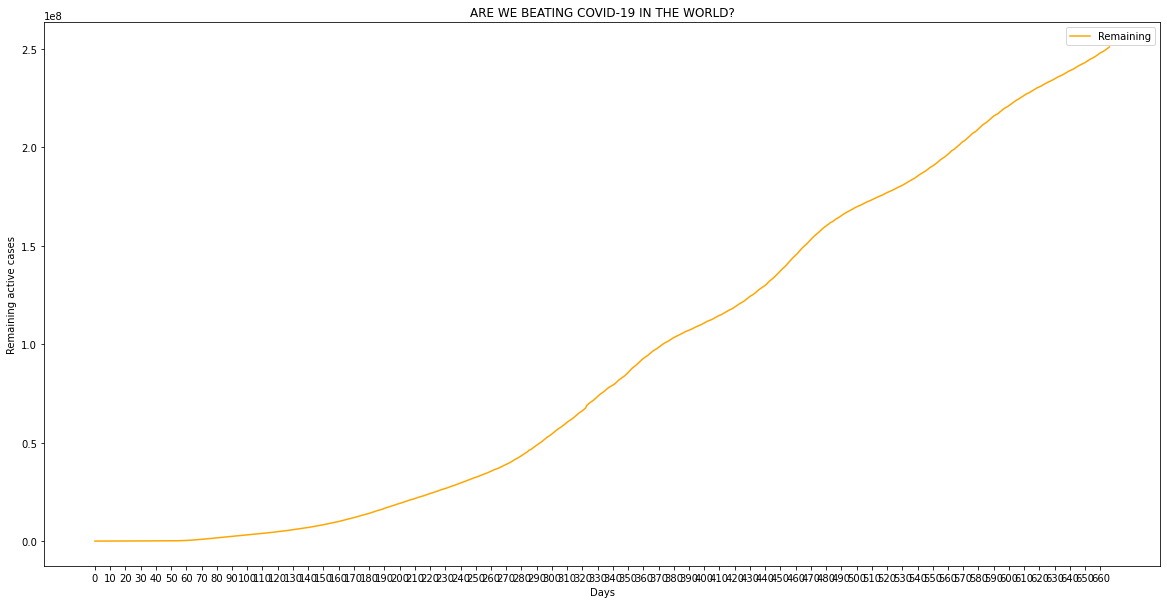

In [4]:
# Formula: 
# remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalfatalities_by_day) - np.array(totalrecovered_by_day)
# Recovering data are no longer available!!
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [5]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
# Mitigate the negative values by converting all negative values to 0
countries_remaining.mask(countries_remaining<0, 0, inplace=True)

# check last day
countries_remaining.tail(1)

,Australia,Czechia,Greece,Papua New Guinea,Summer Olympics 2020,Congo (Brazzaville),Niger,Azerbaijan,China,Bhutan,...,Sudan,Mozambique,Gambia,Guinea-Bissau,Gibraltar,Luxembourg,Albania,North Macedonia,Martinique,Others_and_ships
666,193684.0,1912631.0,844042.0,32901.0,865.0,18208.0,6536.0,560538.0,106050.0,2626.0,...,38459.0,149536.0,9645.0,6288.0,0.0,84798.0,191999.0,203548.0,0.0,699.0


#### Notes: remaining number does not include the recovered data in US

In [6]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
# daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

In [7]:
# plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
# plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
# # plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
# plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
# plt.legend()
# plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Top places/ countries with least remaining COVID cases

In [8]:
# index = countries_remaining.tail(1)
# top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
# top_remaining.plot(kind='bar')
# plt.xticks(rotation=45)
# top_remaining

In [9]:
# countries_remaining[top_remaining.index].plot()
# plt.xlabel('Days')
# plt.ylabel('Remaining active cases')
# plt.title("Top places/ countries with least remaining COVID cases")
# countries_remaining[top_remaining.index]

### Top places/ countries with most remaining COVID cases

In [10]:
# bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
# bottom_remaining.plot(kind='bar')
# plt.title("Total remaining active cases")
# plt.xticks(rotation=45)
# bottom_remaining

In [11]:
# countries_remaining[bottom_remaining.index].plot()
# plt.xlabel('Days')
# plt.ylabel('Remaining active cases')
# plt.title("Top places/ countries with most remaining COVID cases")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464